In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

In [2]:
rep1_STARR = pd.read_csv('counts/STARR_RNA_rep1_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
rep1_STARR.describe()

,count,collapsed_count
count,459634.000000,459634.00000
mean,275.670588,22.95385
std,348.737412,25.86726
min,1.000000,1.00000
25%,3.000000,2.00000
50%,158.000000,16.00000
75%,417.000000,34.00000
max,7680.000000,492.00000


In [3]:
rep2_STARR = pd.read_csv('counts/STARR_RNA_rep2_counts.txt', sep='\t', names=['sequence', 'count', 'collapsed_count'])
rep2_STARR.describe()

,count,collapsed_count
count,652092.000000,652092.000000
mean,233.932499,20.444181
std,259.752499,20.723276
min,1.000000,1.000000
25%,34.000000,5.000000
50%,162.000000,15.000000
75%,334.000000,29.000000
max,10461.000000,649.000000


In [4]:
joined = rep1_STARR.merge(rep2_STARR, on='sequence', how='inner', suffixes=('_1', '_2'))
joined.describe()

,count_1,collapsed_count_1,count_2,collapsed_count_2
count,361503.000000,361503.000000,361503.000000,361503.000000
mean,320.079806,26.447573,306.733914,26.548018
std,366.562079,27.020483,292.907575,23.186990
min,1.000000,1.000000,1.000000,1.000000
25%,16.000000,4.000000,111.000000,10.000000
50%,253.000000,21.000000,233.000000,21.000000
75%,463.000000,38.000000,429.000000,37.000000
max,7680.000000,492.000000,10461.000000,649.000000


In [7]:
joined_filtered = joined.loc[(joined['collapsed_count_1'] > 20) & (joined['collapsed_count_2'] > 20)]

<AxesSubplot:xlabel='collapsed_count_1', ylabel='collapsed_count_2'>

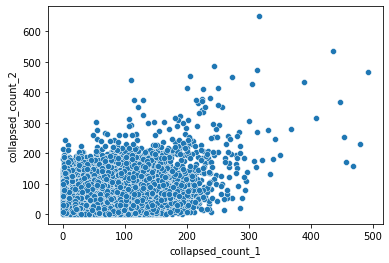

In [16]:
sns.scatterplot(x=joined['collapsed_count_1'], y=joined['collapsed_count_2'])

<AxesSubplot:xlabel='collapsed_count_1', ylabel='collapsed_count_2'>

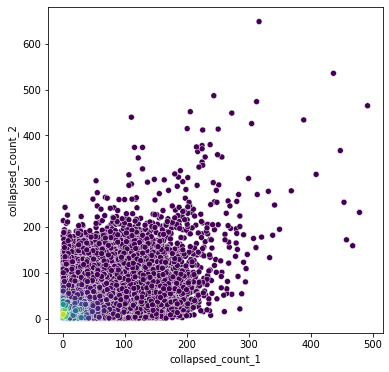

In [17]:
values = np.vstack([joined["collapsed_count_1"], joined["collapsed_count_2"]])
kernel = stats.gaussian_kde(values)(values)
fig, ax = plt.subplots(figsize=(6, 6))
sns.scatterplot(
    data=joined,
    x="collapsed_count_1",
    y="collapsed_count_2",
    c=kernel,
    cmap="viridis",
    ax=ax,
)

In [ ]:
sns.scatterplot(joined, x='count_1', y='count_2')

In [6]:
stats.pearsonr(joined['collapsed_count_1'], joined['collapsed_count_2'])

(0.24253372534709114, 0.0)

In [10]:
stats.pearsonr(joined_filtered['collapsed_count_1'], joined_filtered['collapsed_count_2'])

(0.3118585438378019, 0.0)

In [8]:
stats.pearsonr(joined['count_1'], joined['count_2'])

(0.20574367890169068, 0.0)

In [11]:
rep1_STARR_DNA = pd.read_csv('counts/STARR_DNA_rep1_counts.txt', sep='\t', names=['sequence', 'count'])
rep1_STARR_DNA.describe()

,count
count,839776.000000
mean,30.587678
std,26.926581
min,0.000000
25%,11.000000
50%,25.000000
75%,43.000000
max,445.000000


In [12]:
rep2_STARR_DNA = pd.read_csv('counts/STARR_DNA_rep2_counts.txt', sep='\t', names=['sequence', 'count'])
rep2_STARR_DNA.describe()

,count
count,873831.000000
mean,47.340019
std,44.291297
min,0.000000
25%,15.000000
50%,37.000000
75%,67.000000
max,1012.000000


In [13]:
joined_DNA = rep1_STARR_DNA.merge(rep2_STARR_DNA, on='sequence', how='inner', suffixes=('_1', '_2'))
joined_DNA.describe()

,count_1,count_2
count,780868.000000,780868.000000
mean,32.793997,52.791426
std,26.645801,43.759636
min,1.000000,1.000000
25%,13.000000,22.000000
50%,27.000000,43.000000
75%,45.000000,72.000000
max,445.000000,1012.000000


<AxesSubplot:xlabel='count_1', ylabel='count_2'>

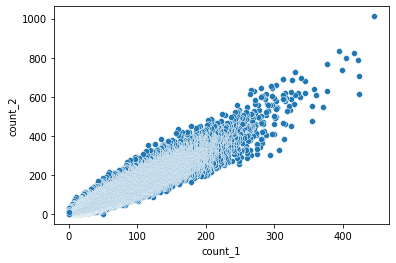

In [14]:
sns.scatterplot(x=joined_DNA['count_1'], y=joined_DNA['count_2'])